In [1]:
from lenet_arch import LeNet
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import mahotas

D:\Users\asus\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Users\asus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Users\asus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


If mahotas is not installed, you can install by uncommenting the cell below:

In [ ]:
# !pip install mahotas

In [6]:
new_model = load_model('modelofMNISTwithLeNet-2.hdf5')

Text(0.5, 1.0, 'preprocessed image')

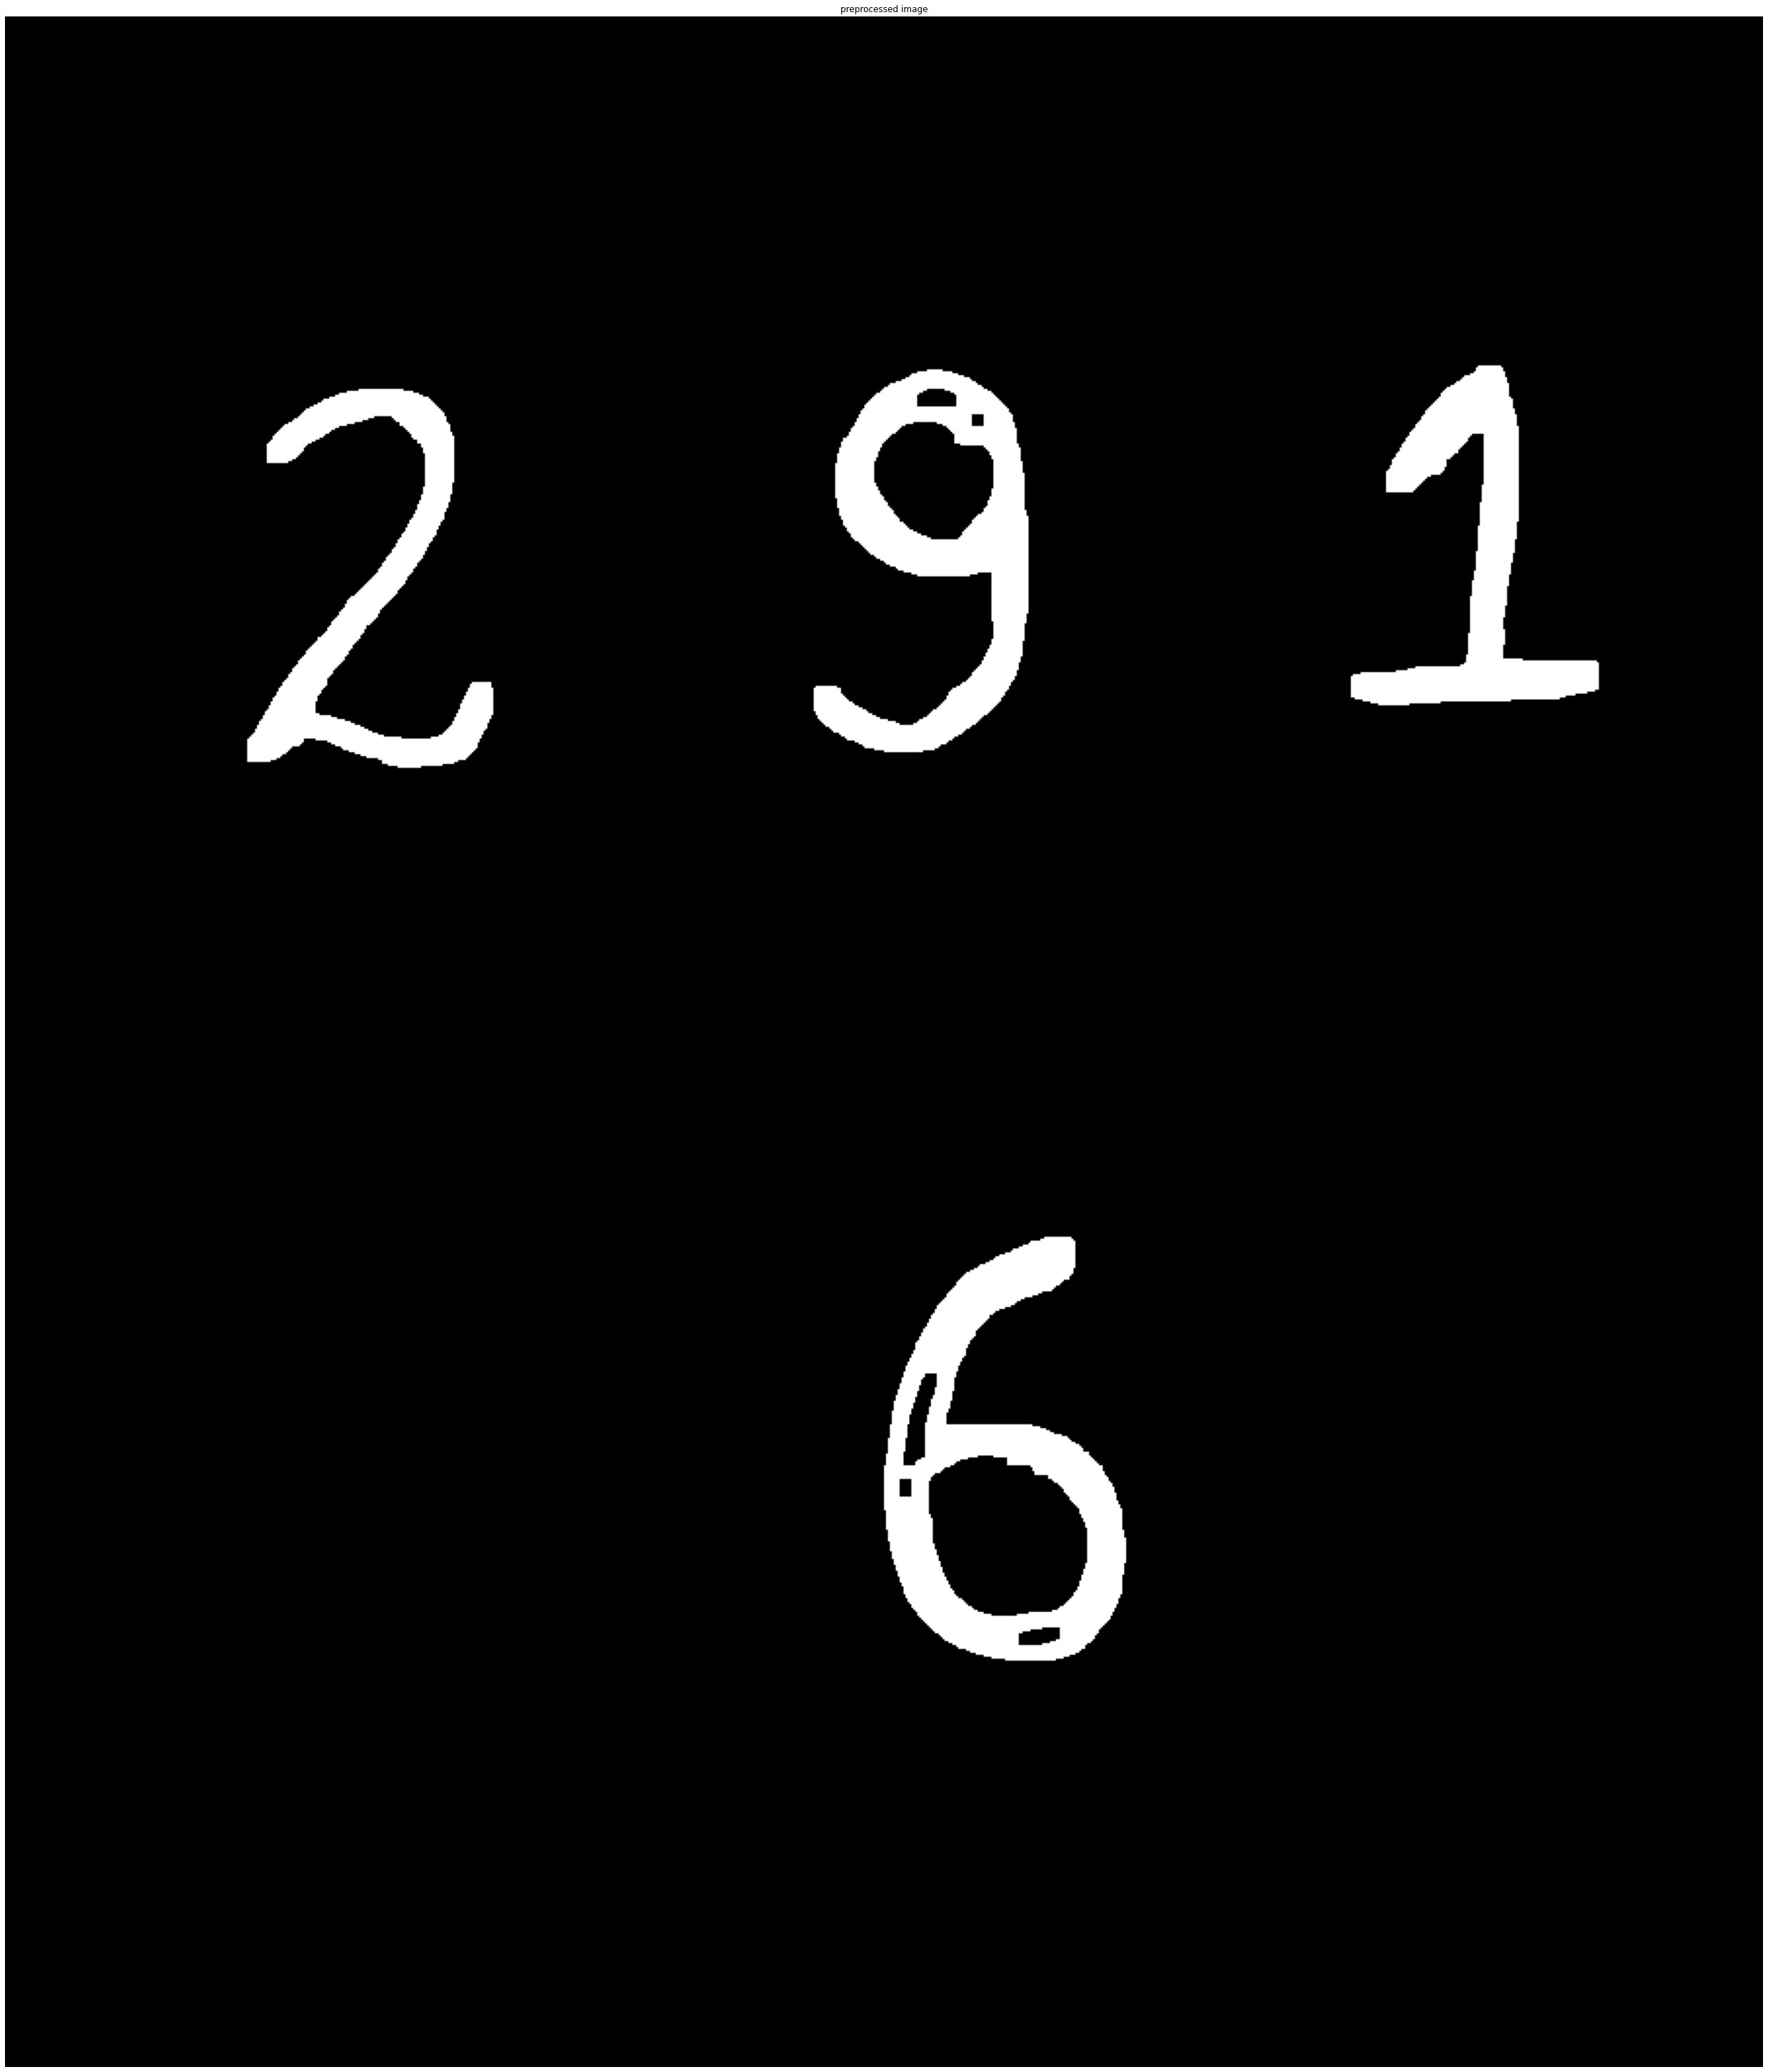

In [89]:
imagePath="test_1.jpg"
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, th1 = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY) 
blurred = cv2.GaussianBlur(th1,(5,5),0)
edged=cv2.Canny(blurred,253,255)


kernald = np.ones((5,5), np.uint8) # 2*2 square shape is our kernal
kernale = np.ones((2,2), np.uint8) # 2*2 square shape is our kernal
dilation = cv2.dilate(edged, kernald, iterations=3)
erosion = cv2.erode(dilation, kernale, iterations=5)


fig = plt.figure(figsize=(150, 150))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("preprocessed image")

Text(0.5, 1.0, 'final image')

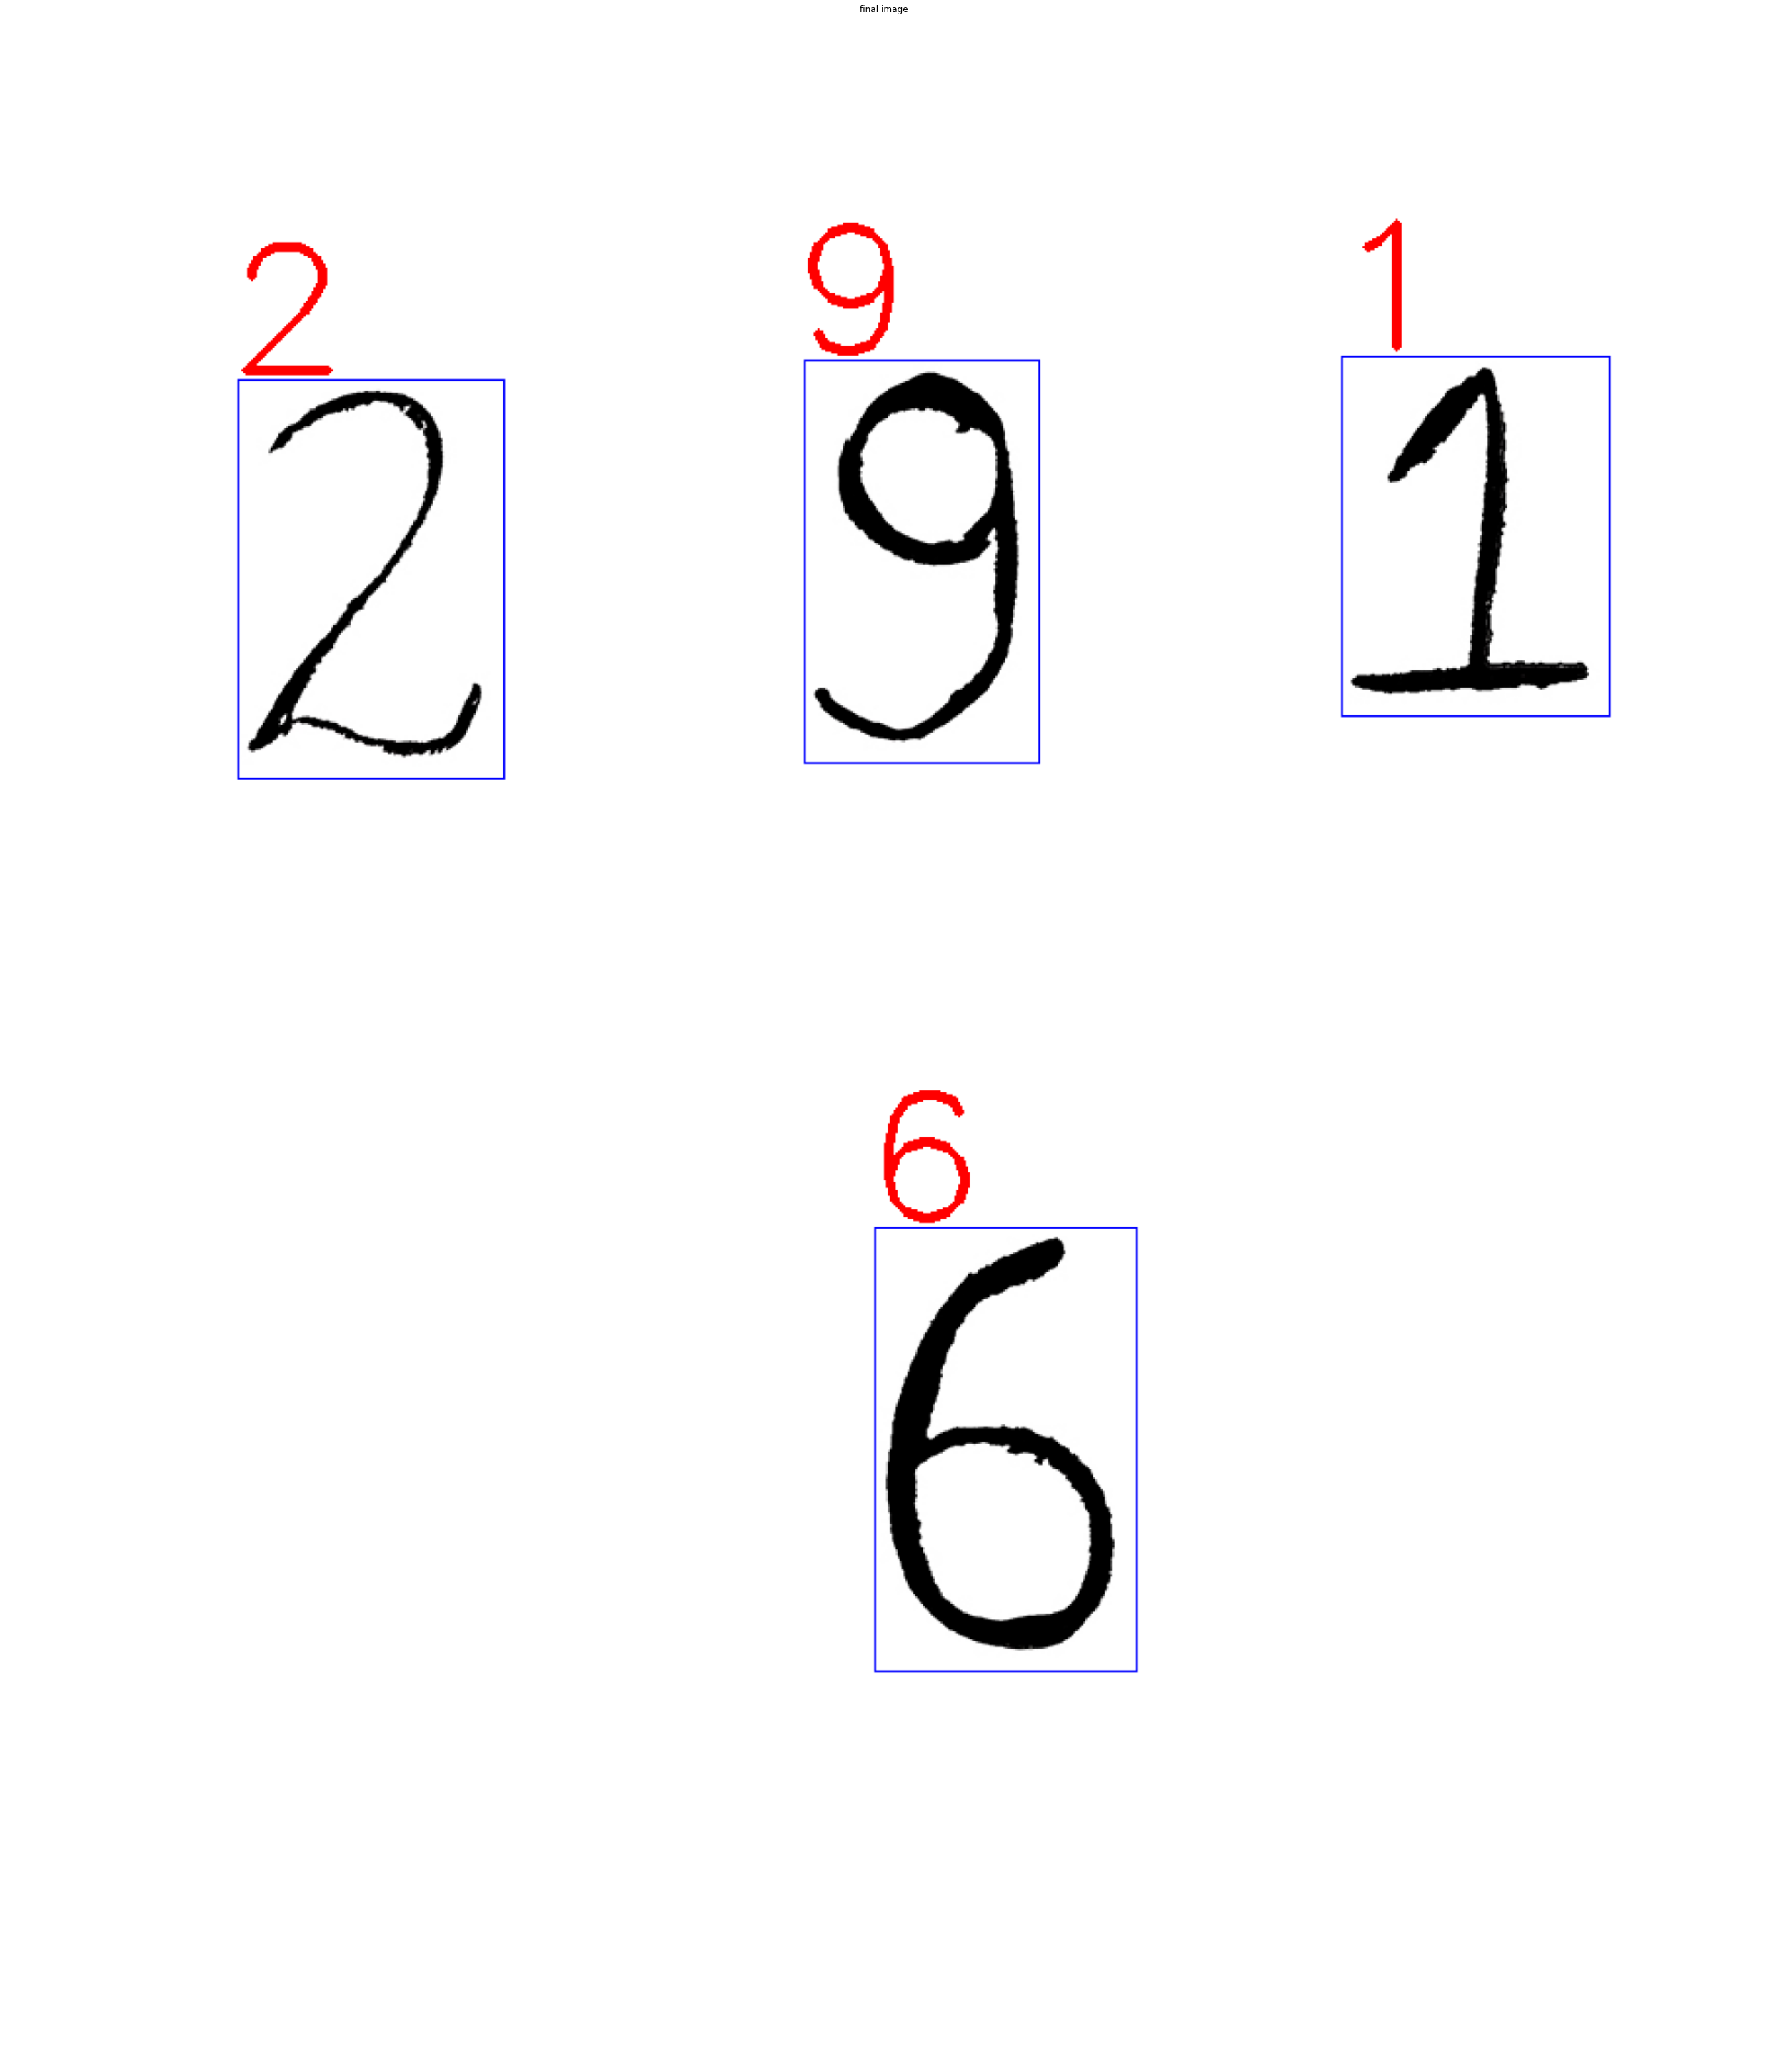

In [90]:
(cnts,_) = cv2.findContours(erosion.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


#cnts = sorted([c,cv2.boundingRect(c)[0] for c in cnts], key = lambda x:x[1])

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    
    if w>=1 and h>= 1:
        roi = gray[y-5:y + h+5, x-5:x + w+5]
        thresh = roi.copy()
        T = mahotas.thresholding.otsu(roi)
        thresh[thresh > T] = 255
        thresh = cv2.bitwise_not(thresh)
        thresh=cv2.resize(thresh, (28,28),cv2.INTER_AREA)
       
        
        thresh = img_to_array(thresh)

        thresh = thresh.astype("float") / 255.0
        
        digit = new_model.predict(thresh.reshape(-1,28,28,1),batch_size=1).argmax(axis=1)[0]


        digit = str(digit)
       
        cv2.rectangle(image, (x-5, y-5), (x + w+5, y + h+5),(255, 0, 0), 1)
        cv2.putText(image, str(digit), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 3)


fig = plt.figure(figsize=(150, 150))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("final image")

Text(0.5, 1.0, 'preprocessed image')

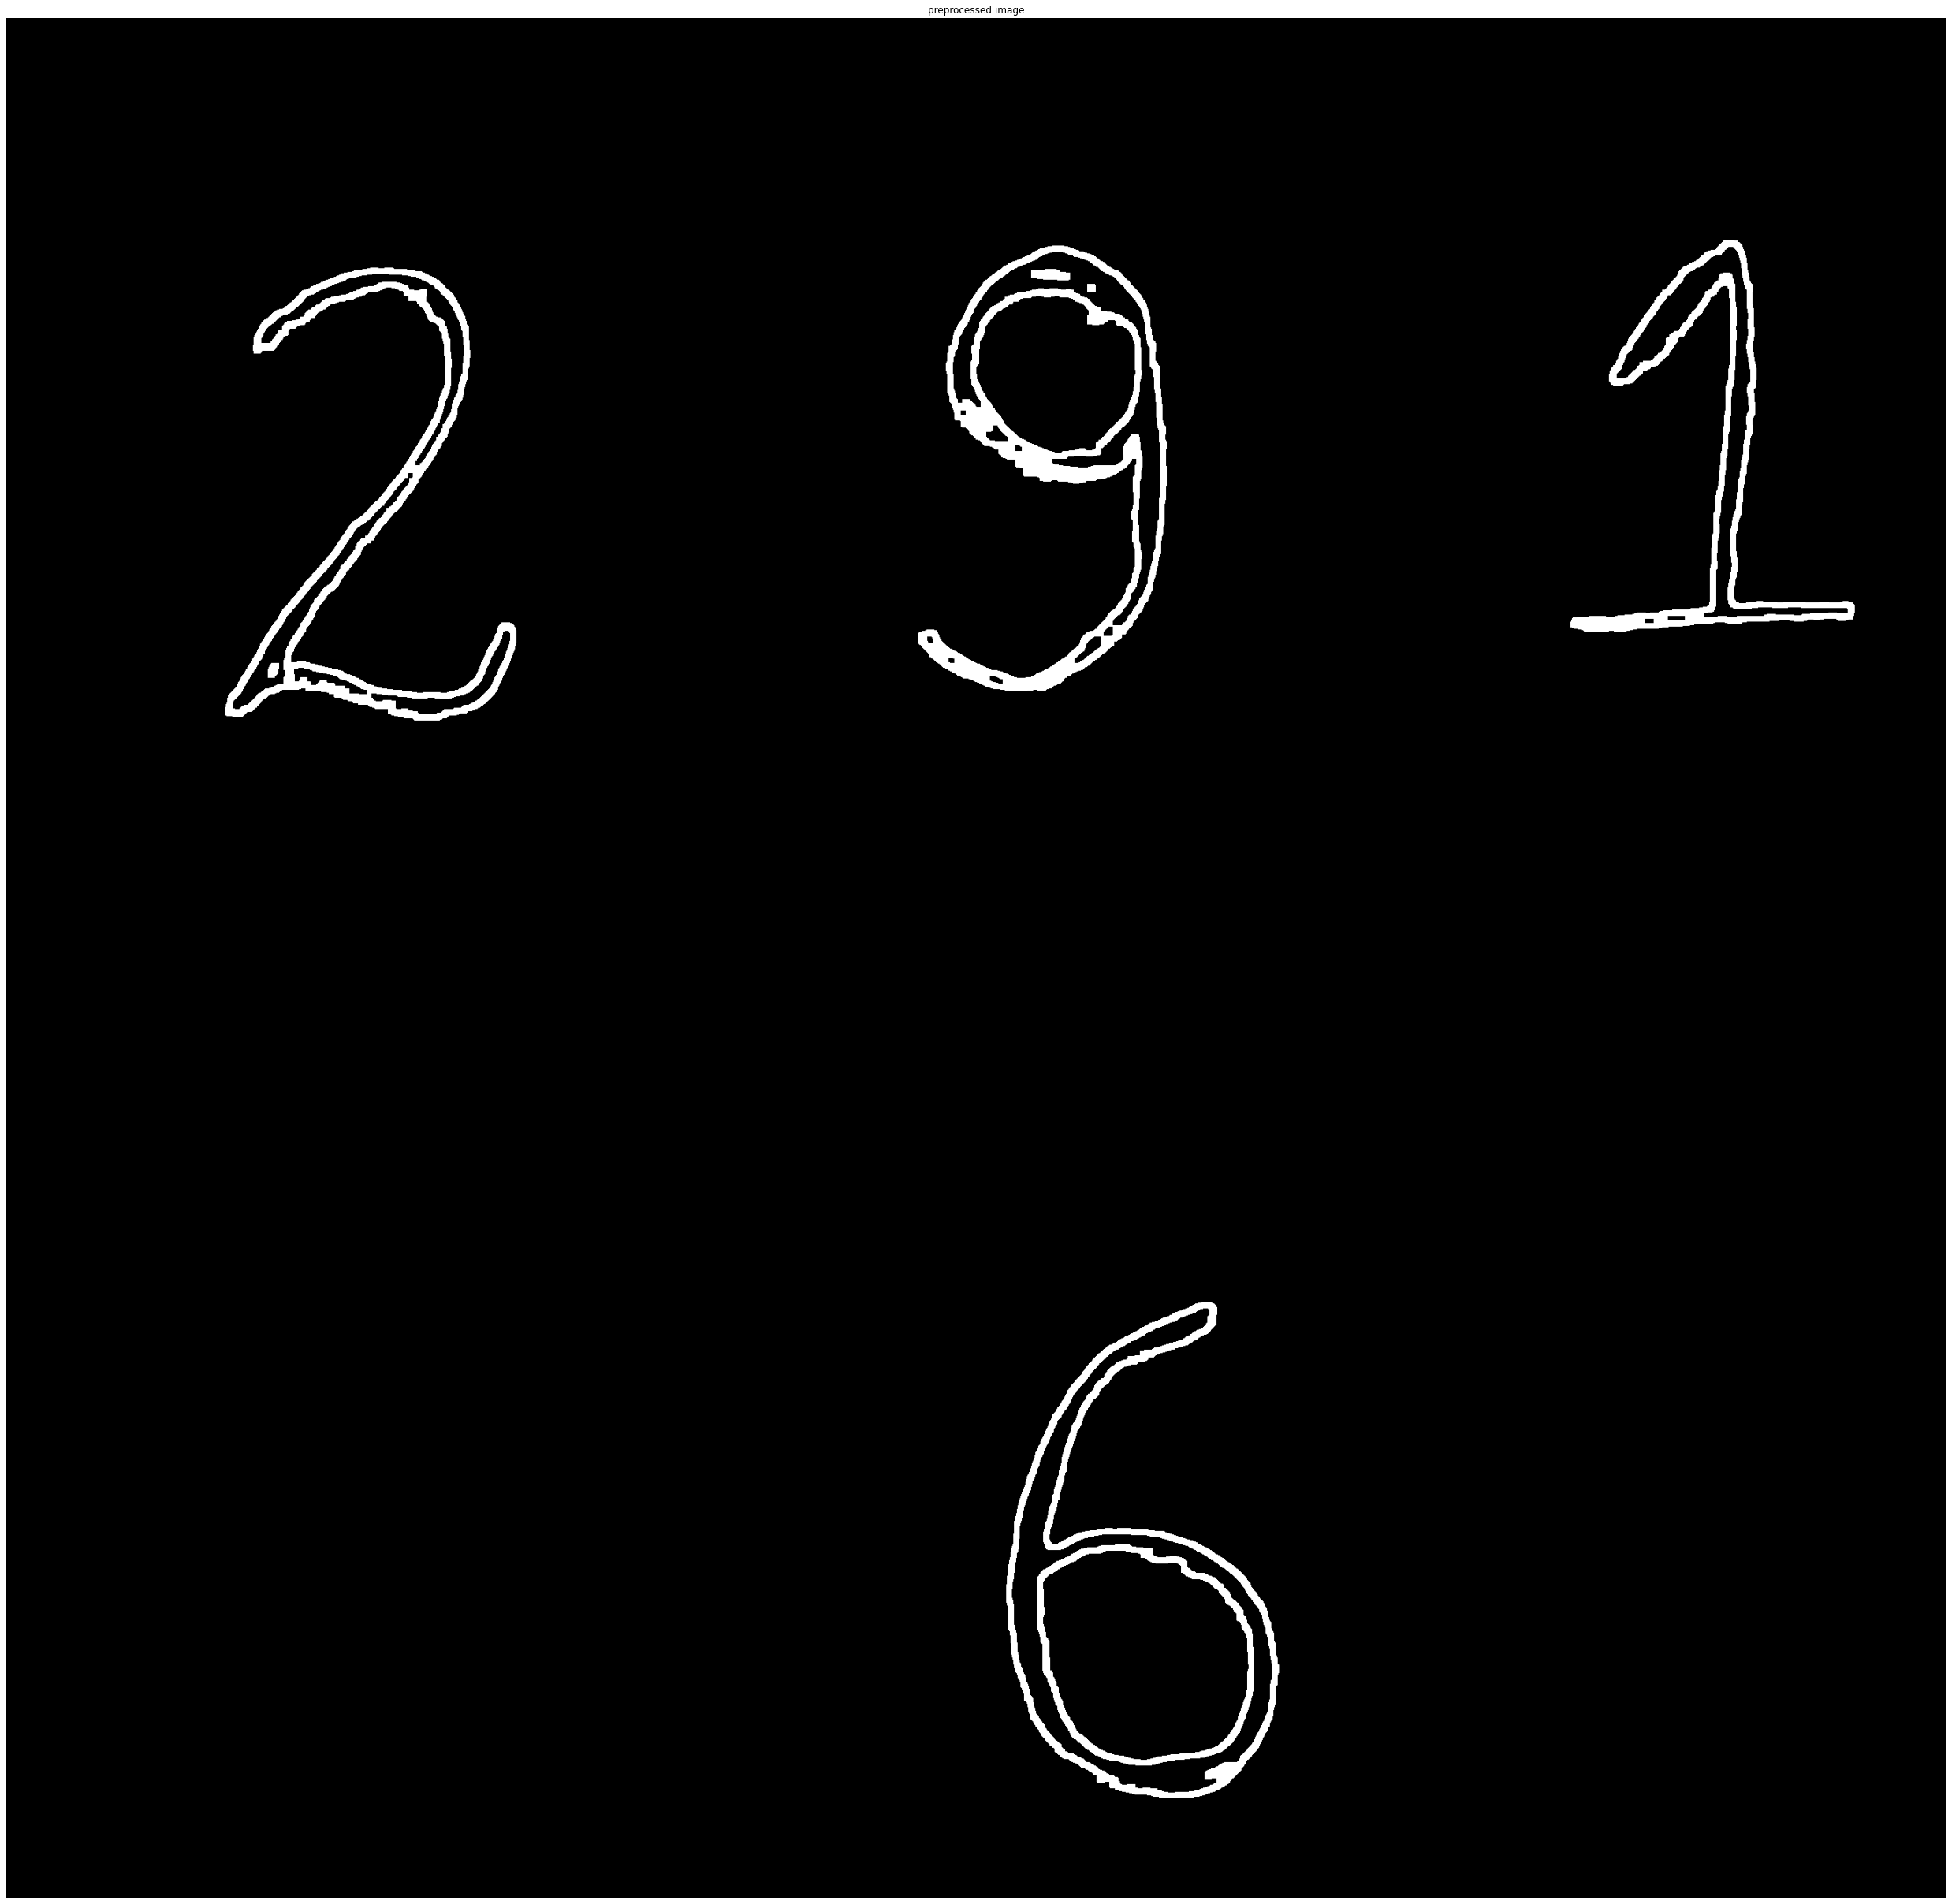

In [93]:
imagePath="t1.jpg"
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, th1 = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY) 
blurred = cv2.GaussianBlur(th1,(5,5),0)
edged=cv2.Canny(blurred,253,255)


kernald = np.ones((5,5), np.uint8) # 2*2 square shape is our kernal
kernale = np.ones((2,2), np.uint8) # 2*2 square shape is our kernal
dilation = cv2.dilate(edged, kernald, iterations=3)
erosion = cv2.erode(dilation, kernale, iterations=5)


fig = plt.figure(figsize=(150, 150))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("preprocessed image")

Text(0.5, 1.0, 'final image')

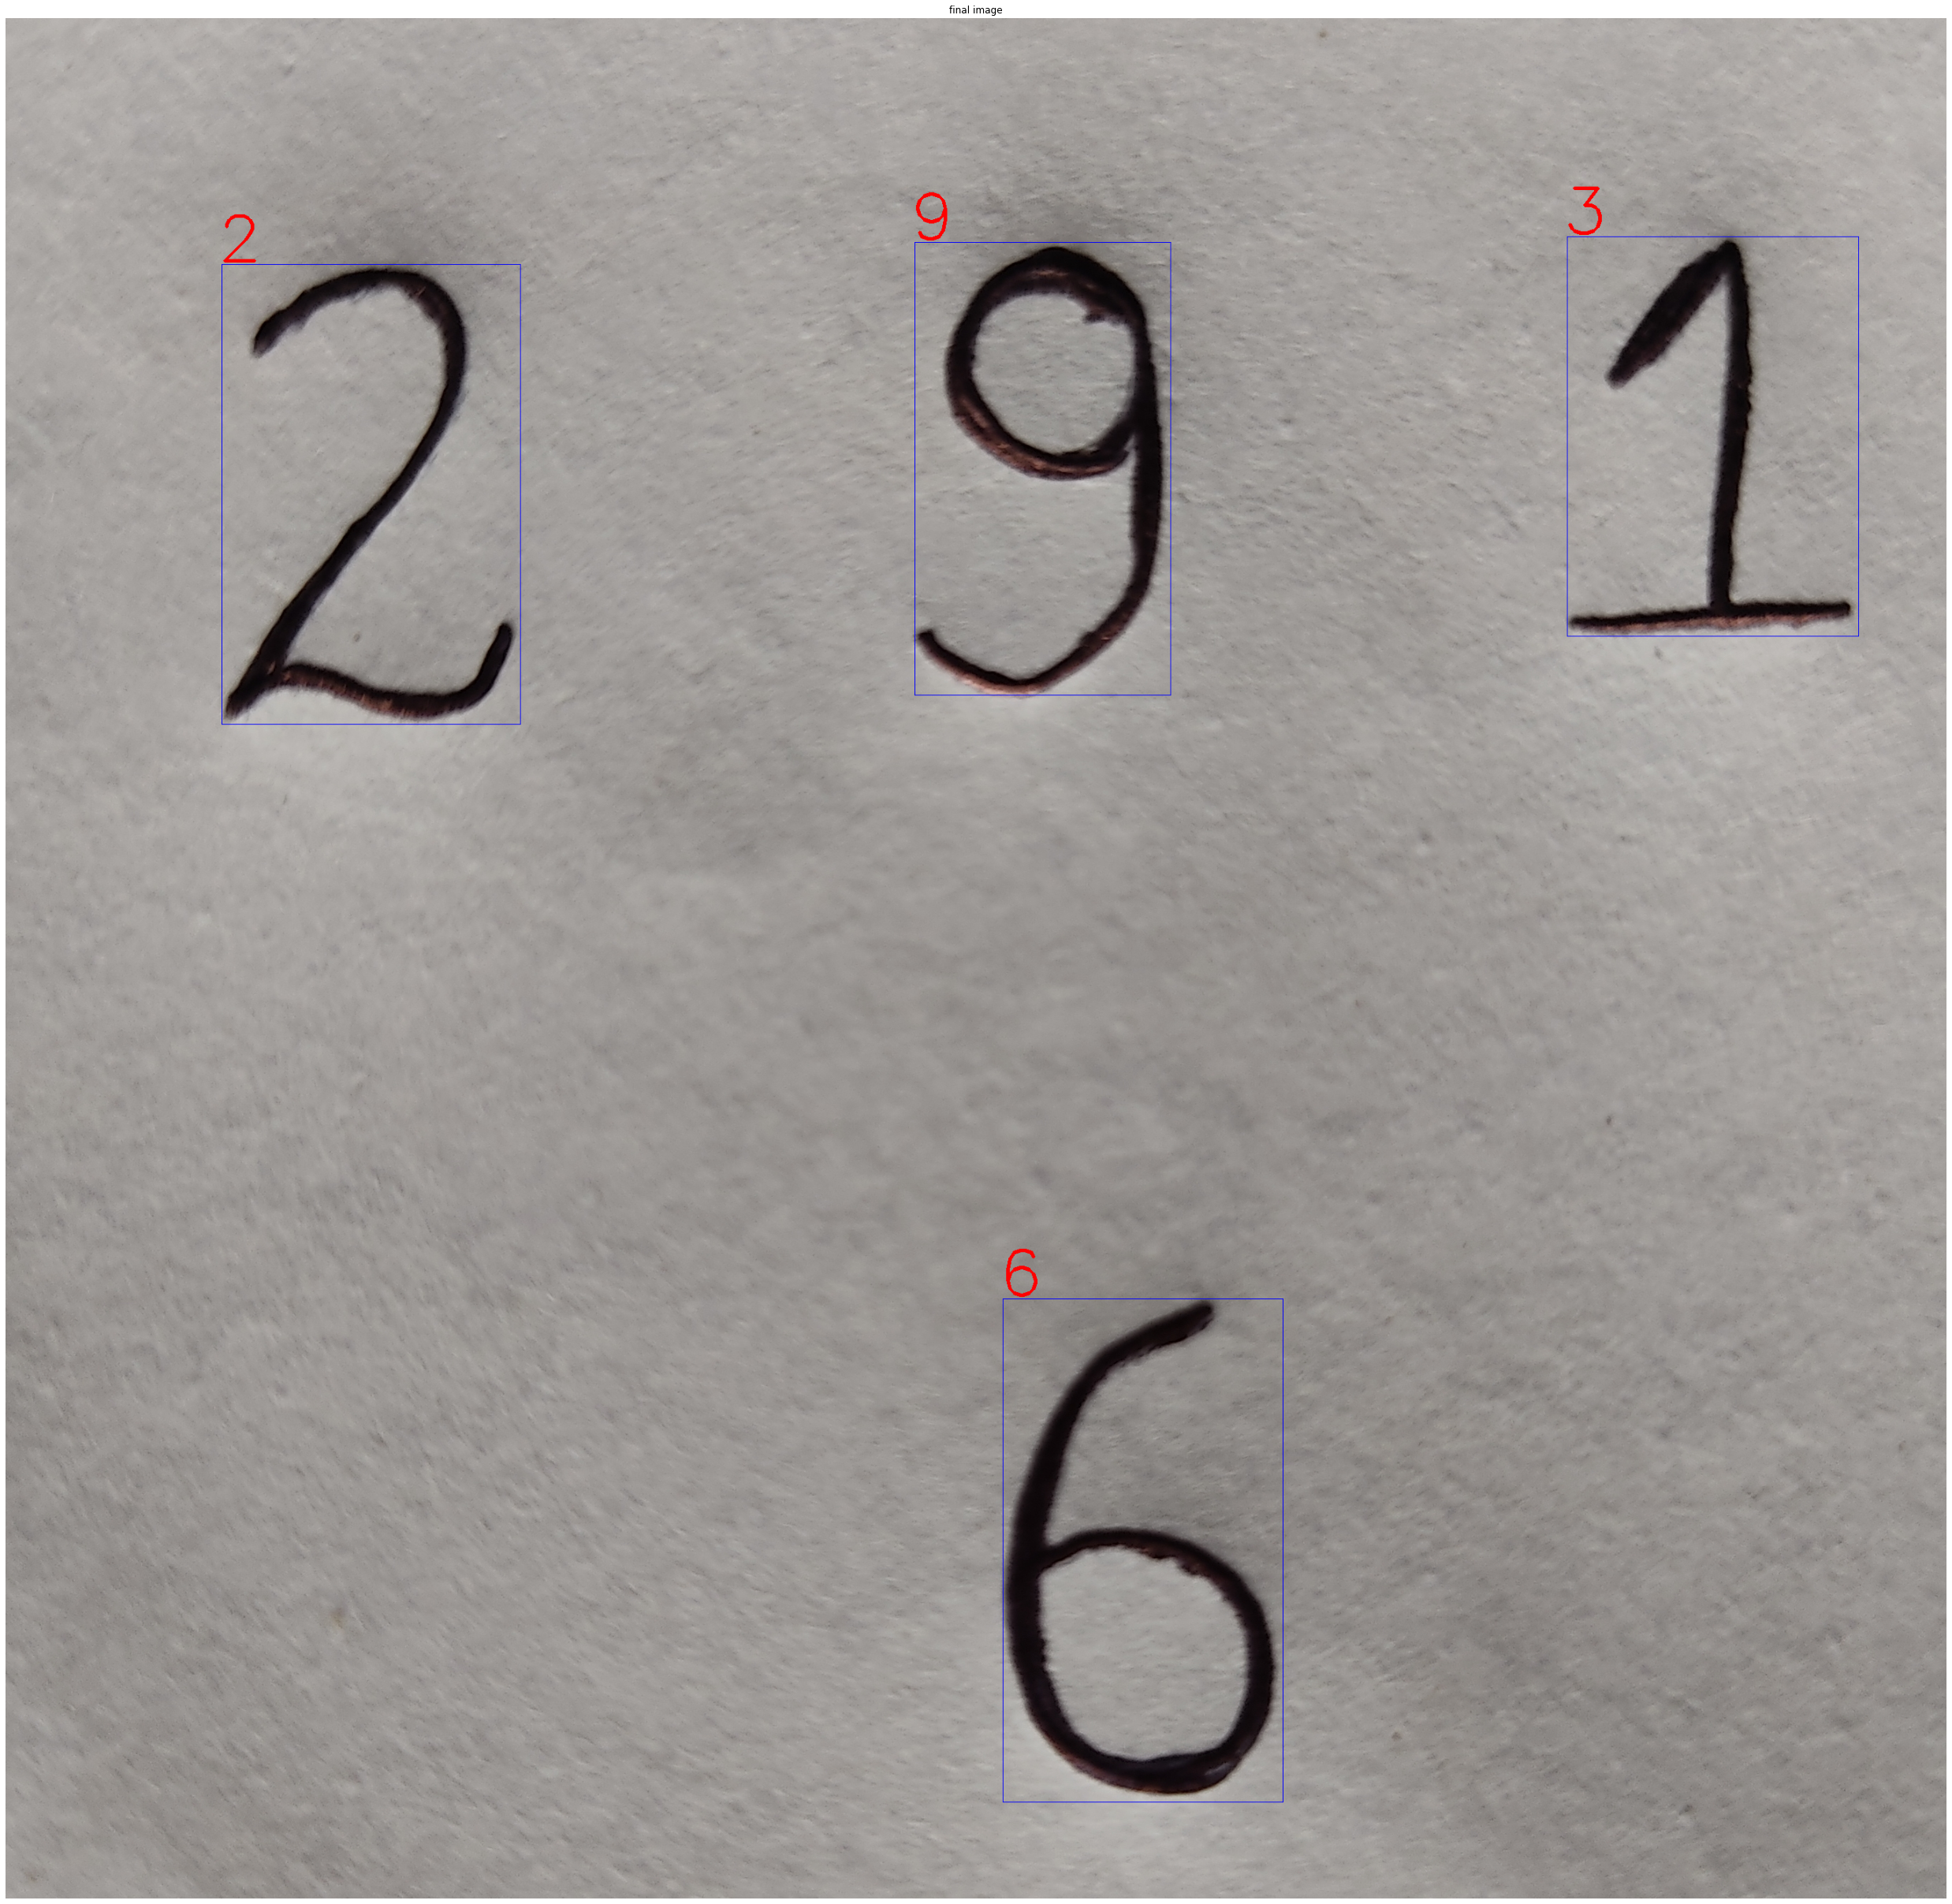

In [94]:
(cnts,_) = cv2.findContours(erosion.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


#cnts = sorted([c,cv2.boundingRect(c)[0] for c in cnts], key = lambda x:x[1])

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    
    if w>=1 and h>= 1:
        roi = gray[y-5:y + h+5, x-5:x + w+5]
        thresh = roi.copy()
        T = mahotas.thresholding.otsu(roi)
        thresh[thresh > T] = 255
        thresh = cv2.bitwise_not(thresh)
        thresh=cv2.resize(thresh, (28,28),cv2.INTER_AREA)
       
        
        thresh = img_to_array(thresh)

        thresh = thresh.astype("float") / 255.0
        
        digit = new_model.predict(thresh.reshape(-1,28,28,1),batch_size=1).argmax(axis=1)[0]


        digit = str(digit)
       
        cv2.rectangle(image, (x-5, y-5), (x + w+5, y + h+5),(255, 0, 0), 1)
        cv2.putText(image, str(digit), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 3)


fig = plt.figure(figsize=(150, 150))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("final image")